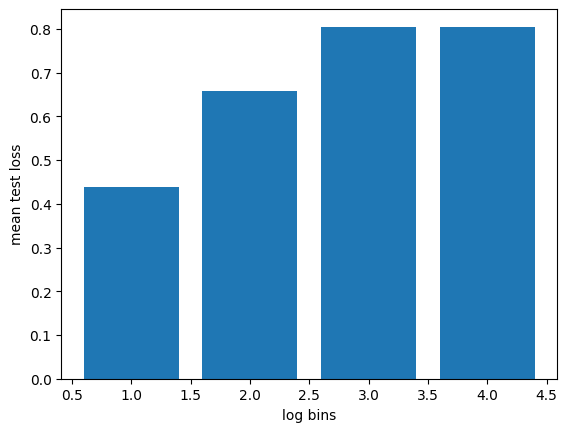

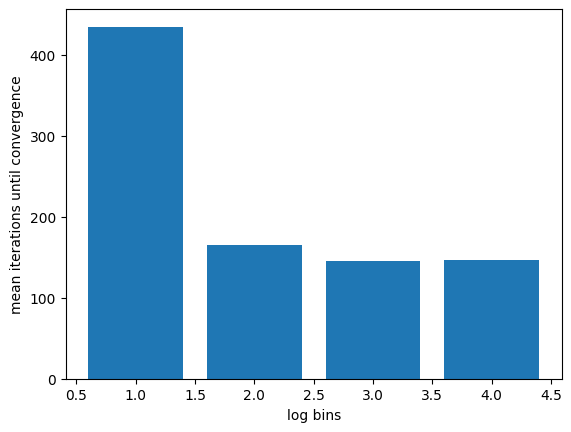

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)

In [3]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)

gradients = np.hstack((ng,qg1,qg2,qg3))

AxisError: axis 0 is out of bounds for array of dimension 0